In [298]:
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
root = ET.parse('/home/luke/Downloads/sms.xml').getroot()

In [299]:
data = []
for child in root:
    data.append([child.attrib['name'],child.attrib['body'],child.attrib['type'],child.attrib['time'],child.attrib['date'],child.attrib['address'],])
df = pd.DataFrame(data, columns=['person','content','type','time','timestamp_ms','number'])

df['source'] = 'sms'

In [301]:
#cleaning phone numbers, empty contacts

for i in ['-','+','(',')',' ']:
    df['number'] = df['number'].map(lambda x: x.replace(i,''))

df['number'] = df['number'].map(lambda x: x.lstrip('1'))

#phone number instances that didnt sync with contact name???

# dfBlank = df.loc[df['name'] == '']
# dfBlankNumbers = dfblank['number'].value_counts()

# dfBlanks = pd.DataFrame(dftest)
# dfBlanks.to_csv('blanknumbers.csv')

dfCSV = pd.read_csv('blanknumbers.csv')
dfCSV['name'] = dfCSV['name'].astype(str)

for index, row in dfCSV.iterrows():
    df.loc[df['number'] == str(row['number']), 'person'] = row['name']

In [304]:
#identifying sender

df['type'] = df['type'].astype(int)

df['direction'] = np.nan
df.loc[df['type']== 2, 'direction'] = 'sent'
df.loc[df['type']== 1, 'direction'] = 'received'

In [305]:
# creating format to match facebook

dfSMS = df[['person', 'timestamp_ms','content']].copy()
dfSMS['category'] = df['direction'] + ' ' + 'sms'
dfSMS.to_csv('sms.csv')

In [307]:
Person = '' #name here
dfPlot = dfSMS.loc[dfSMS['person'] == Person]

In [309]:
dfFB = pd.read_csv('fb.csv',index_col=False)
dfFB = dfFB[['person', 'timestamp_ms','content','category']]


In [310]:
result = dfPlot.append(dfFB, ignore_index=True, sort=False)

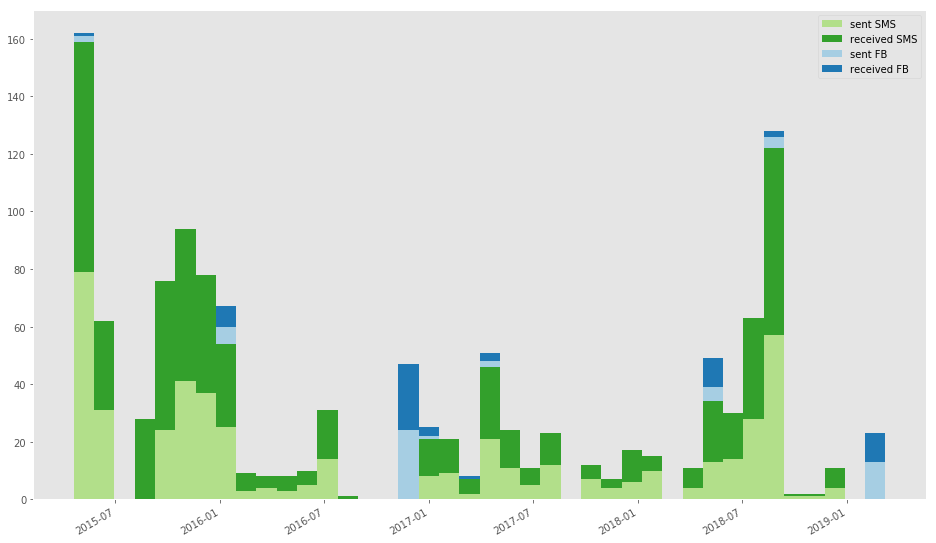

In [313]:
result['date'] = result['timestamp_ms'].astype(int)
result['days'] = result['date']/1000
result['days'] = result['days'].astype(int)
result['days'] = pd.to_datetime(result['days'], unit='s')
#dfPerson['days'] = dfPerson['days'].dt.to_period('d')


sentSMS = list(result[result['category'] == 'sent sms']['days'])
receivedSMS = list(result[result['category'] == 'received sms']['days'])
sentFB = list(result[result['category'] == 'sent facebook']['days'])
receivedFB = list(result[result['category'] == 'received facebook']['days'])


with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(16,10))

    ax.hist([sentSMS, receivedSMS, sentFB, receivedFB], label=['sent SMS','received SMS','sent FB','received FB'], bins = 40, 
            stacked=True, color=['#b2df8a','#33a02c','#a6cee3','#1f78b4'])
    #sent and receive aren't perfectly equal, need a better way to specify date range
    fig.autofmt_xdate()
    ax.legend()
    ax.grid(False)
    plt.show()

In [329]:
text = result['content'].str.cat(sep=' ')

In [334]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download()
    
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(text) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
   
print(filtered_sentence) 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/luke/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
